In [20]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\New folder\DA\ds_salaries.csv")
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [9]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [15]:
df.fillna(0, inplace=True)


In [17]:
print(df.shape)
print(df.columns)

(607, 12)
Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


In [18]:

df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.isnull().sum())


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


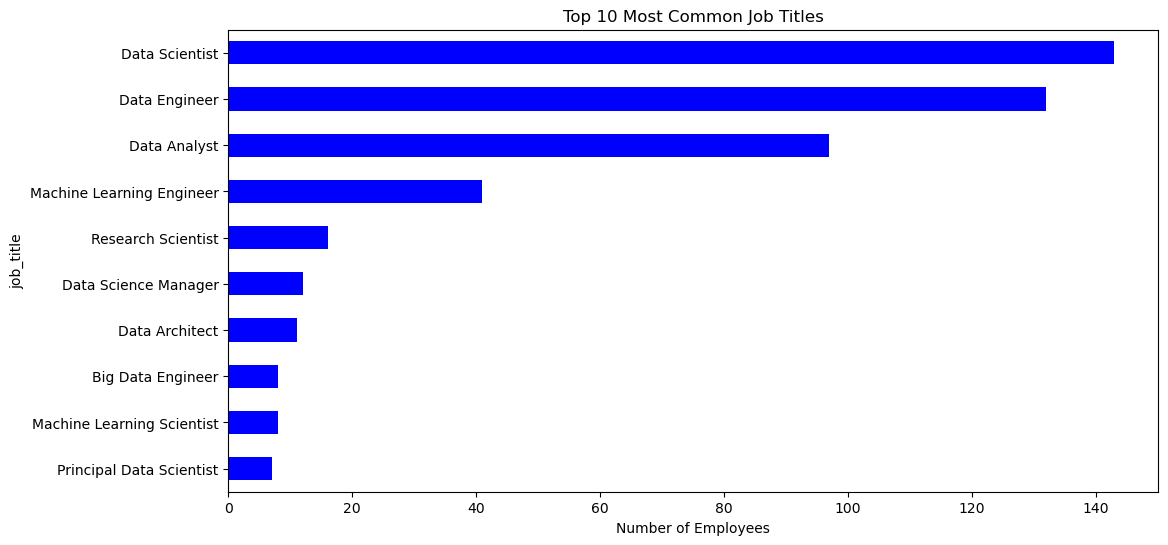

In [21]:
plt.figure(figsize=(12,6))
df['job_title'].value_counts().head(10).plot(kind='barh', color='blue')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Employees')
plt.gca().invert_yaxis()
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


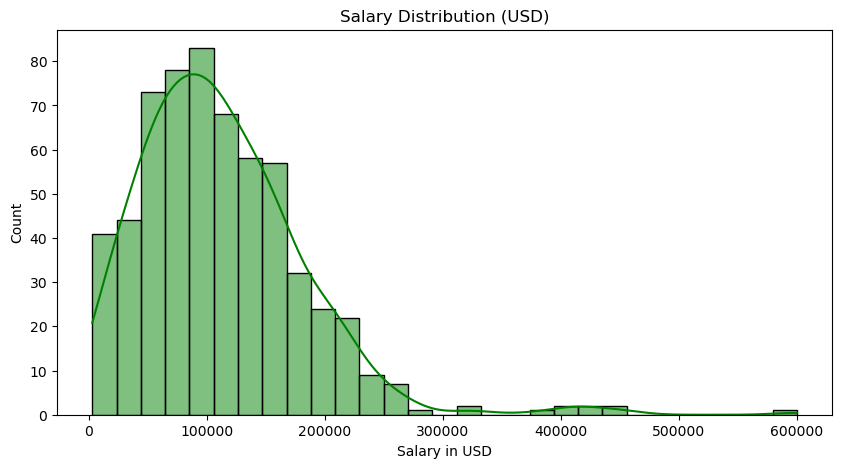

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], kde=True, color='green')
plt.title('Salary Distribution (USD)')
plt.xlabel('Salary in USD')
plt.show()

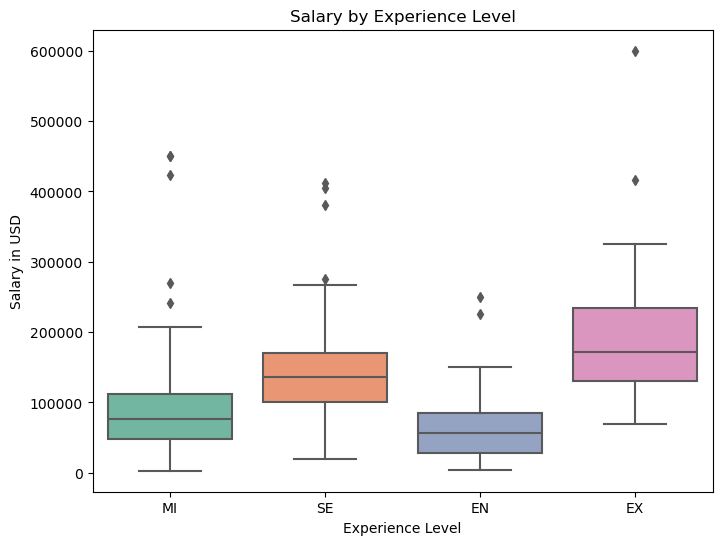

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='Set2')
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

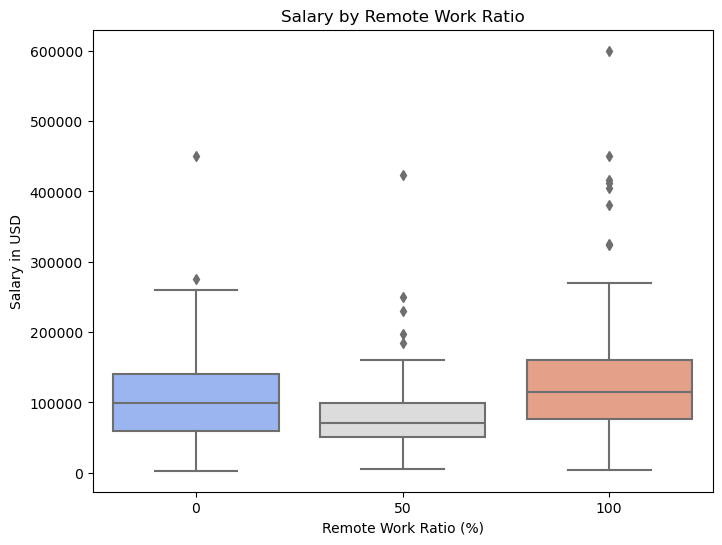

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df, palette='coolwarm')
plt.title('Salary by Remote Work Ratio')
plt.xlabel('Remote Work Ratio (%)')
plt.ylabel('Salary in USD')
plt.show()

Explained Variance by Each Component: [0.27845418 0.15020387 0.13359962 0.12646888 0.11360861 0.1068146
 0.07827411 0.01257612]


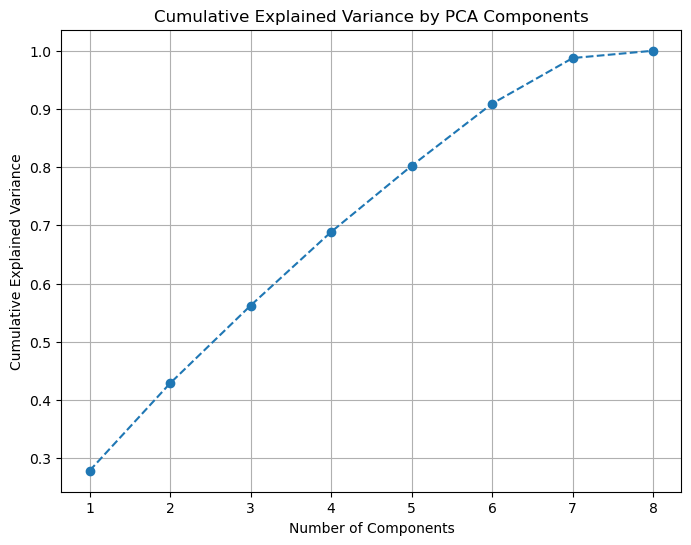

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Each Component:", explained_variance)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


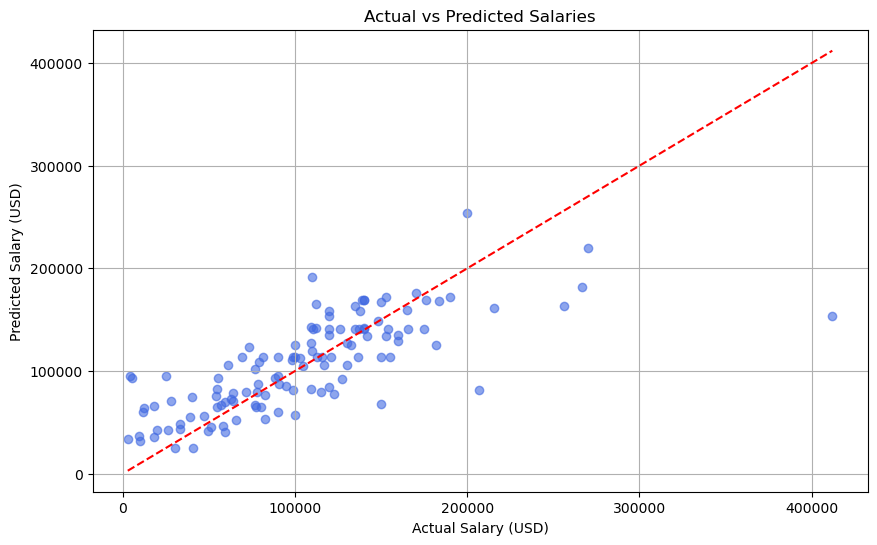

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test, rf_pred, color='royalblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.grid(True)
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
df=pd.read_csv(r"C:\Users\Admin\Desktop\New folder\DA\ds_salaries.csv")
enc = LabelEncoder()
for col in ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']:
    df[col] = enc.fit_transform(df[col])

X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd']) 
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linrg = LinearRegression()
linrg.fit(X_train, y_train)

y_pred = linrg.predict(X_test)

print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred))
print("Linear Regression R² Score:", r2_score(y_test, y_pred))



Linear Regression MAE: 35789.55704597759
Linear Regression R² Score: 0.31388066550415294


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


enc = LabelEncoder()
for col in ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']:
    df[col] = enc.fit_transform(df[col])

X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df['salary_in_usd'] > 50000  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_rg = LogisticRegression()
log_rg.fit(X_train, y_train)


y_pred = log_rg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.819672131147541
Confusion Matrix:
 [[ 4 17]
 [ 5 96]]


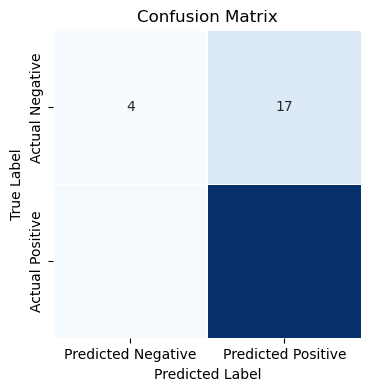

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], 
            square=True, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
